In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score,classification_report,precision_recall_curve,roc_auc_score,roc_curve,precision_recall_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('logistic_regression.csv')

### EDA

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [59]:
#differentiation category and numerical columns

In [8]:
cat_col =[]
con_col =[]
for i in df.columns:
    if df[i].nunique() < 40:
        cat_col.append(i)
    else:
        con_col.append(i)

In [9]:
con_col

['loan_amnt',
 'int_rate',
 'installment',
 'emp_title',
 'annual_inc',
 'issue_d',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'address']

In [10]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

In [60]:
#finding the missing value columns

In [11]:
missing_cols = pd.DataFrame(df.isna().sum(),columns=['miss'] )
missing_cols=missing_cols.loc[missing_cols.miss > 0].index
missing_cols

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [61]:
#Feature engineeriing

In [12]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].apply(lambda x: 1 if x >=1.0 else 0)
df["pub_rec"]=df["pub_rec"].apply(lambda x: 1 if x >=1.0 else 0)
df["mort_acc"]=df["mort_acc"].apply(lambda x: 1 if x >=1.0 else 0)
df['pincode'] = df['address'].str[-5:]

In [13]:
df.drop(['address'],inplace=True,axis=1)

In [14]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                      2
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                     2
pub_rec_bankruptcies         2
pincode                     10
dtype: int64

In [15]:
cols = df.columns

In [16]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
pincode                     0
dtype: int64

In [62]:
#checking the quantiles to validate the thereshold of quantile

In [17]:
df.quantile([0.05,0.1,0.2,0.90,0.95,0.97,0.99,1])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0.05,3250.0,6.89,109.5100,28000.0,4.68,5.0,0.0,1685.00,11.2,9.0,0.0,0.0
0.10,5000.0,7.89,158.8600,34000.0,6.90,6.0,0.0,3091.00,19.7,12.0,0.0,0.0
0.20,6625.0,9.67,218.8100,42000.0,10.01,7.0,0.0,5099.80,31.3,15.0,0.0,0.0
0.90,26000.0,19.52,785.4800,120000.0,28.50,18.0,1.0,31470.00,86.2,41.0,1.0,1.0
0.95,30975.0,21.97,925.6000,150000.0,31.58,21.0,1.0,41066.55,92.0,47.0,1.0,1.0
0.97,35000.0,23.28,1028.8013,175000.0,33.34,23.0,1.0,50070.26,94.7,52.0,1.0,1.0
0.99,35000.0,25.28,1202.3730,250000.0,36.43,27.0,1.0,86039.62,98.0,60.0,1.0,1.0
1.00,40000.0,30.99,1533.8100,8706582.0,9999.00,90.0,1.0,1743266.00,892.3,151.0,1.0,1.0


In [18]:
numerical_cols = ['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']

In [63]:
## univairiate analysis

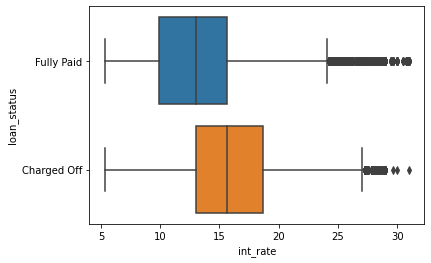

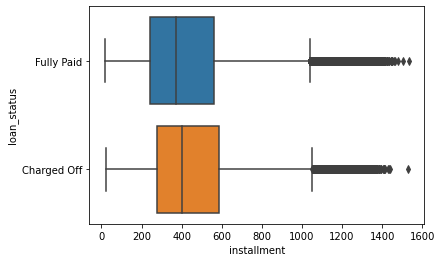

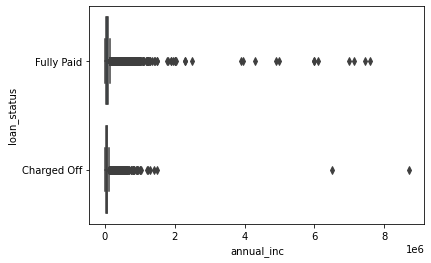

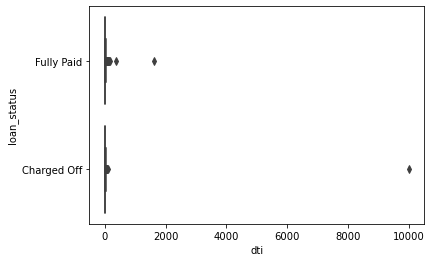

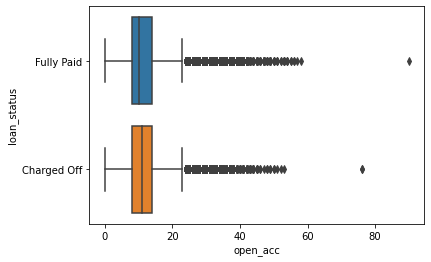

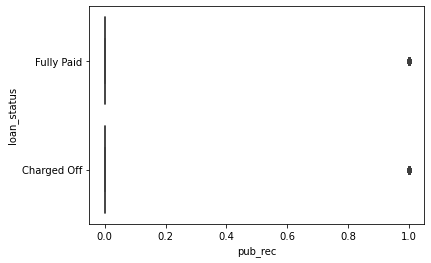

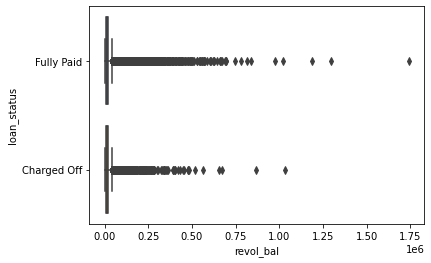

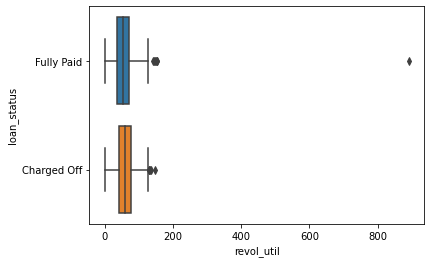

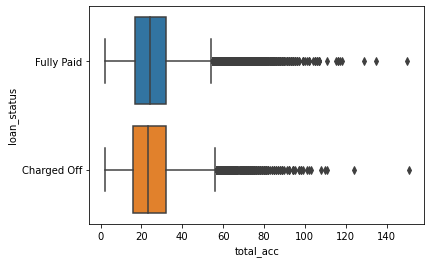

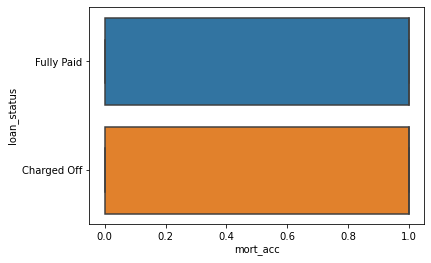

In [19]:
for i in numerical_cols:
    sns.boxplot(x=df[i],y=df['loan_status'])
    plt.show()

In [64]:
#removing outliers in the features

In [20]:
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.97)]
df = df[df['int_rate'] < df['int_rate'].quantile(0.97)]
df = df[df['loan_amnt']< df['loan_amnt'].quantile(0.97)]
df = df[df['installment'] < df['installment'].quantile(0.97)]
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.97)]
df = df[df['open_acc'] < df['open_acc'].quantile(0.97)]
df = df[df['total_acc'] < df['total_acc'].quantile(0.97)]
df = df[df['revol_util'] < df['revol_util'].quantile(0.97)]
df = df[df['dti'] < df['dti'].quantile(0.97)]
df = df[df['pub_rec'] < df['pub_rec'].quantile(0.99)]
df = df[df['revol_bal'] < df['revol_bal'].quantile(0.95)]


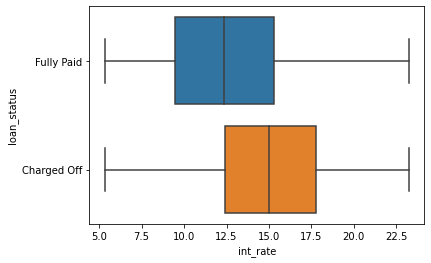

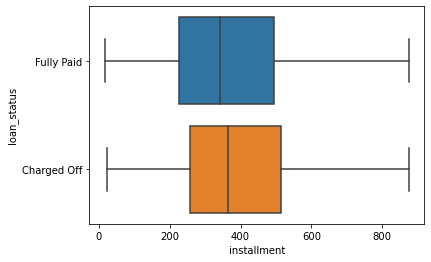

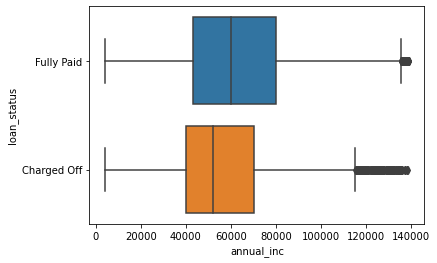

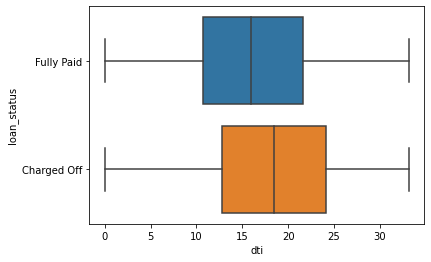

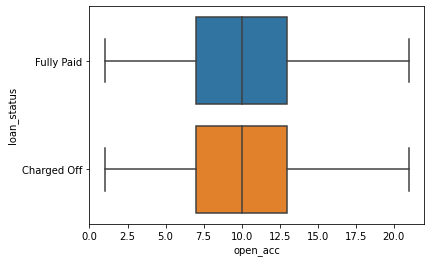

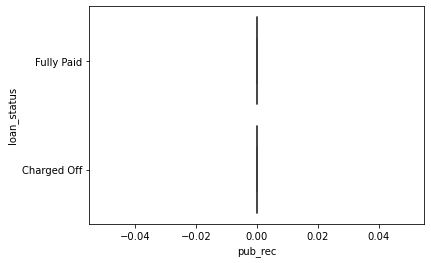

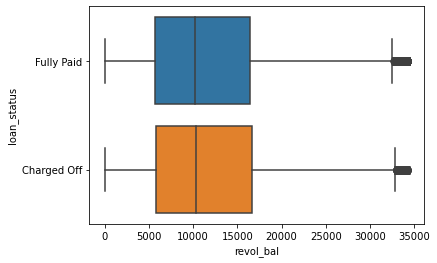

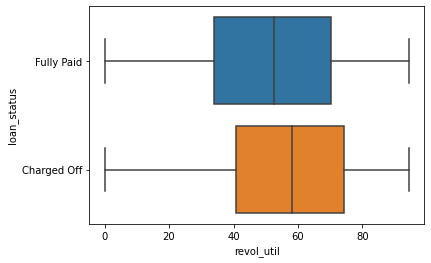

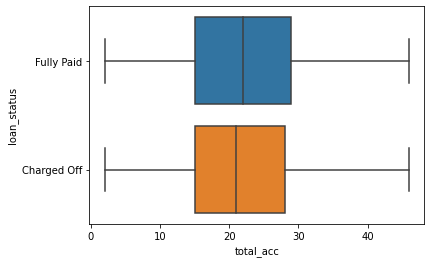

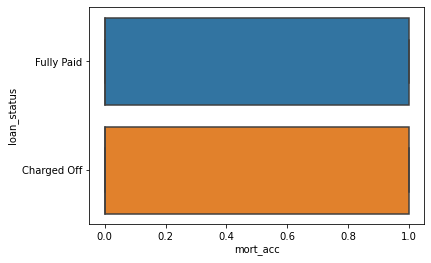

In [21]:
for i in numerical_cols:
    sns.boxplot(x=df[i],y=df['loan_status'])
    plt.show()

In [65]:
#Outliers are treated for the features

<AxesSubplot:ylabel='loan_amnt'>

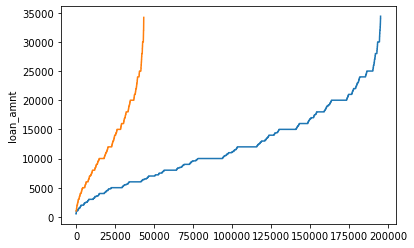

In [22]:
sns.lineplot(x=np.arange(len(df['loan_amnt'][df['loan_status']=='Fully Paid'])),
             y=df['loan_amnt'][df['loan_status']=='Fully Paid'].sort_values())
sns.lineplot(x=np.arange(len(df['loan_amnt'][df['loan_status']=='Charged Off'])),
             y=df['loan_amnt'][df['loan_status']=='Charged Off'].sort_values())

In [66]:
# Feature Engineering

In [23]:
df['emp_length'].unique()

array(['4 years', '< 1 year', '6 years', '2 years', '10+ years',
       '7 years', '9 years', '8 years', '5 years', '3 years', '1 year',
       nan], dtype=object)

In [24]:
# replacing the null values with -1 and greater than 10years with 11 and lessthan 1 year with 0
df['emp_length'].replace({'< 1 year':'0 years','10+ years':'11 years',np.nan:'-1 years'},inplace=True)

In [25]:
df['emp_length']=df['emp_length'].str[:-5]
df['emp_length']=df['emp_length'].astype('int64')

In [26]:
df['emp_title'] = df['emp_title'].replace({np.nan:'Unknown'})

In [27]:
df['title'].replace({np.nan:df['title'].mode()[0]},inplace=True)

In [28]:
df['revol_util'].replace({np.nan:df['revol_util'].median()},inplace=True)

In [29]:
df['grade'].replace({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1},inplace=True)

In [30]:
df['verification_status'].replace({'Verified':1,'Source Verified':1,'Not Verified':0},inplace=True)

In [31]:
df['issue_month'] = df['issue_d'].str[:3]
df['issue_year'] = df['issue_d'].str[-4:]
df.drop(['issue_d'],inplace=True,axis = 1)

In [32]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].str[:3]
df['earliest_cr_line_year'] = df['earliest_cr_line'].str[-4:]
df.drop(['earliest_cr_line'],inplace=True,axis = 1)

In [33]:
target = df['loan_status']
target = pd.DataFrame(target,columns=['loan_status'])
target['loan_status'].replace({'Fully Paid':1,'Charged Off':0},inplace=True)

In [34]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                     0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
pincode                   0
issue_month               0
issue_year                0
earliest_cr_line_month    0
earliest_cr_line_year     0
dtype: int64

In [67]:
# Imputed the features and there are no missing values

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
1,8000.0,36 months,11.99,265.68,6,B5,Credit analyst,4,MORTGAGE,65000.0,...,27.0,f,INDIVIDUAL,1,0,05113,Jan,2015,Jul,2004
2,15600.0,36 months,10.49,506.97,6,B3,Statistician,0,RENT,43057.0,...,26.0,f,INDIVIDUAL,0,0,05113,Jan,2015,Aug,2007
3,7200.0,36 months,6.49,220.65,7,A2,Client Advocate,6,RENT,54000.0,...,13.0,f,INDIVIDUAL,0,0,00813,Nov,2014,Sep,2006
6,18000.0,36 months,5.32,542.07,7,A1,Software Development Engineer,2,MORTGAGE,125000.0,...,25.0,f,INDIVIDUAL,1,0,22690,Sep,2015,Aug,2005
7,13000.0,36 months,11.14,426.47,6,B2,Office Depot,11,RENT,46000.0,...,15.0,f,INDIVIDUAL,0,0,30723,Sep,2012,Sep,1994


In [36]:
df['home_ownership'].value_counts()

MORTGAGE    109345
RENT        106567
OWN          22535
OTHER           91
NONE            21
ANY              2
Name: home_ownership, dtype: int64

In [37]:
df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})

In [38]:
df['home_ownership'].value_counts()

MORTGAGE    109345
RENT        106567
OWN          22535
OTHER          114
Name: home_ownership, dtype: int64

In [39]:
## To reduce data inconsistency
df['title'] = df['title'].str.lower()
df['purpose'] = df['purpose'].str.lower()
df['emp_title'] = df['emp_title'].str.lower()

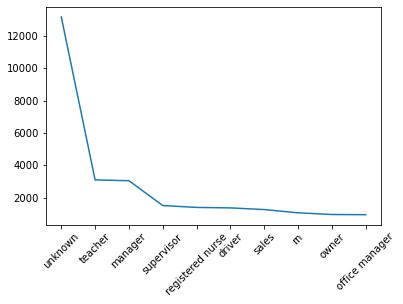

In [40]:
plt.xticks(rotation =45)
plt.plot(df['emp_title'].value_counts()[:10])

Teacher and manager are the most common professions,

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan_status', ylabel='count'>

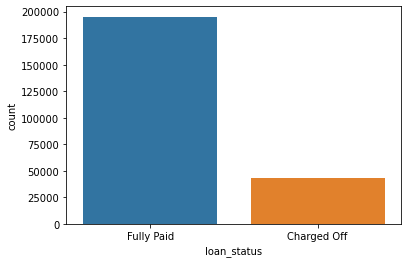

In [41]:
sns.countplot(df['loan_status'])

In [42]:
x = df['loan_status'][df['loan_status']=='Fully Paid'].value_counts() 
y = df['loan_status'][df['loan_status']=='Charged Off'].value_counts() 

print('Percentage of fully paid customers is ' + str(np.round(list(x)[0]/(list(y)[0]+list(x)[0])*100,2))+'%')

Percentage of fully paid customers is 81.84%


In [57]:
x = df['grade'][(df['grade']==7) & (df['loan_status'] == 'Fully Paid')].value_counts() 
y = df['grade'][(df['grade']==7) & (df['loan_status'] == 'Charged Off')].value_counts() 
print('Percentage of fully paid customers is ' + str(np.round(list(x)[0]/(list(y)[0]+list(x)[0])*100,2))+'%')

Percentage of fully paid customers is 93.71%


In [68]:
## BiVariate Analysis

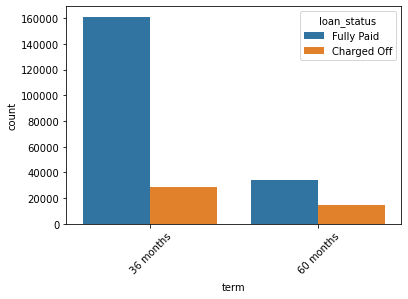

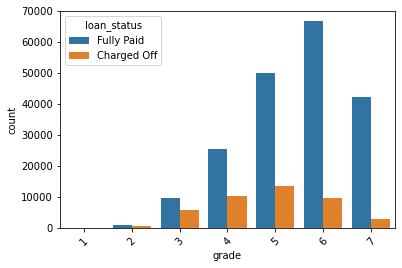

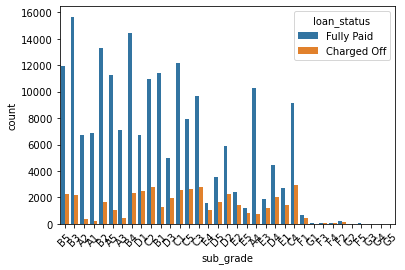

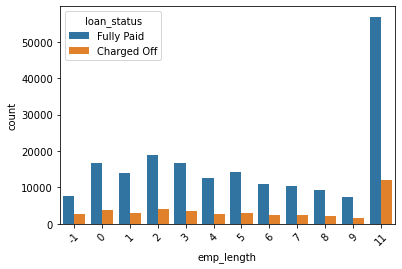

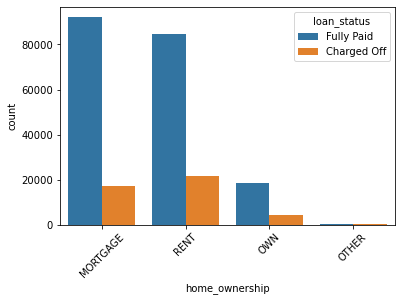

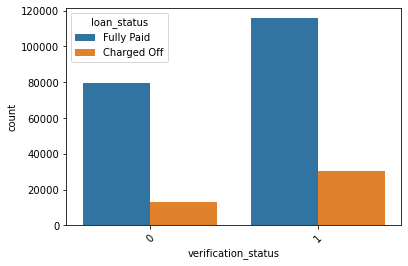

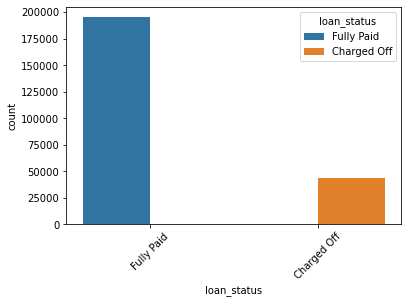

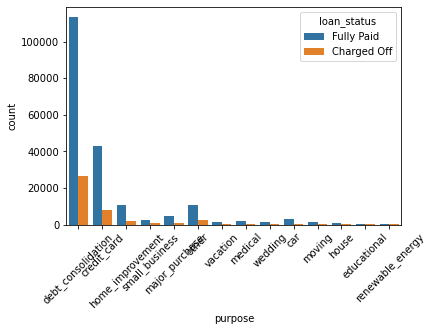

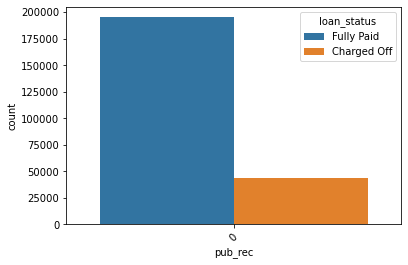

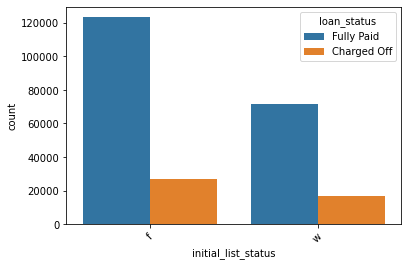

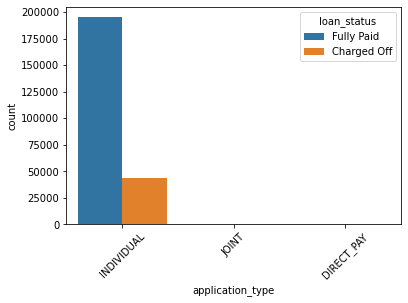

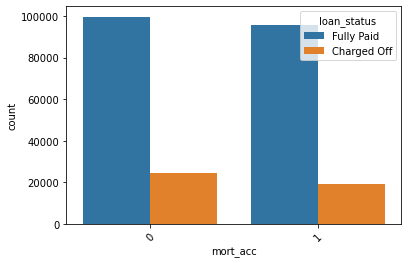

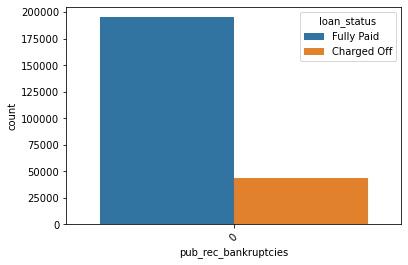

In [43]:
for i in cat_col:
    sns.countplot(x=df[i],hue = df['loan_status'])
    plt.xticks(rotation =45)
    plt.show()

In [44]:
con_col

['loan_amnt',
 'int_rate',
 'installment',
 'emp_title',
 'annual_inc',
 'issue_d',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'address']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238561 entries, 1 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               238561 non-null  float64
 1   term                    238561 non-null  object 
 2   int_rate                238561 non-null  float64
 3   installment             238561 non-null  float64
 4   grade                   238561 non-null  int64  
 5   sub_grade               238561 non-null  object 
 6   emp_title               238561 non-null  object 
 7   emp_length              238561 non-null  int64  
 8   home_ownership          238561 non-null  object 
 9   annual_inc              238561 non-null  float64
 10  verification_status     238561 non-null  int64  
 11  loan_status             238561 non-null  object 
 12  purpose                 238561 non-null  object 
 13  title                   238561 non-null  object 
 14  dti                 

In [46]:
df[['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']]= df[['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']].astype('float64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238561 entries, 1 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               238561 non-null  float64
 1   term                    238561 non-null  object 
 2   int_rate                238561 non-null  float64
 3   installment             238561 non-null  float64
 4   grade                   238561 non-null  int64  
 5   sub_grade               238561 non-null  object 
 6   emp_title               238561 non-null  object 
 7   emp_length              238561 non-null  int64  
 8   home_ownership          238561 non-null  object 
 9   annual_inc              238561 non-null  float64
 10  verification_status     238561 non-null  int64  
 11  loan_status             238561 non-null  object 
 12  purpose                 238561 non-null  object 
 13  title                   238561 non-null  object 
 14  dti                 

In [48]:
df['verification_status'].unique()

array([0, 1], dtype=int64)

In [49]:
df[['int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc']].head()

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc
1,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,1.0
2,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0
3,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0
6,5.32,542.07,125000.0,1.36,8.0,0.0,4178.0,4.9,25.0,1.0
7,11.14,426.47,46000.0,26.87,11.0,0.0,13425.0,64.5,15.0,0.0


In [101]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
1,8000.0,36 months,11.99,265.68,6,B5,credit analyst,4,MORTGAGE,65000.0,...,27.0,f,INDIVIDUAL,1.0,0,05113,Jan,2015,Jul,2004
2,15600.0,36 months,10.49,506.97,6,B3,statistician,0,RENT,43057.0,...,26.0,f,INDIVIDUAL,0.0,0,05113,Jan,2015,Aug,2007
3,7200.0,36 months,6.49,220.65,7,A2,client advocate,6,RENT,54000.0,...,13.0,f,INDIVIDUAL,0.0,0,00813,Nov,2014,Sep,2006
6,18000.0,36 months,5.32,542.07,7,A1,software development engineer,2,MORTGAGE,125000.0,...,25.0,f,INDIVIDUAL,1.0,0,22690,Sep,2015,Aug,2005
7,13000.0,36 months,11.14,426.47,6,B2,office depot,11,RENT,46000.0,...,15.0,f,INDIVIDUAL,0.0,0,30723,Sep,2012,Sep,1994


In [102]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'other', 'vacation', 'medical',
       'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [103]:
df.nunique()

loan_amnt                   1270
term                           2
int_rate                     476
installment                40809
grade                          7
sub_grade                     35
emp_title                 106288
emp_length                    12
home_ownership                 4
annual_inc                 17504
verification_status            2
loan_status                    2
purpose                       14
title                      31070
dti                         3317
open_acc                      21
pub_rec                        1
revol_bal                  32808
revol_util                  1002
total_acc                     45
initial_list_status            2
application_type               3
mort_acc                       2
pub_rec_bankruptcies           1
pincode                       10
issue_month                   12
issue_year                    10
earliest_cr_line_month        12
earliest_cr_line_year         63
dtype: int64

In [69]:
# One hot Encoding

In [104]:
one_hot_cols=['term','verification_status','pub_rec','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']

In [105]:
cont = pd.get_dummies(df['term'],prefix='term',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['verification_status'],prefix='verification_status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['pub_rec'],prefix='pub_rec',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['initial_list_status'],prefix='initial_list_status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['application_type'],prefix='application_type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['mort_acc'],prefix='mort_acc',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

cont = pd.get_dummies(df['pub_rec_bankruptcies'],prefix='pub_rec_bankruptcies',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

In [106]:
df.drop(one_hot_cols,inplace=True,axis = 1)

In [107]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,term_ 60 months,verification_status_1,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,mort_acc_1.0
1,8000.0,11.99,265.68,6,B5,credit analyst,4,MORTGAGE,65000.0,Fully Paid,...,Jan,2015,Jul,2004,0,0,0,1,0,1
2,15600.0,10.49,506.97,6,B3,statistician,0,RENT,43057.0,Fully Paid,...,Jan,2015,Aug,2007,0,1,0,1,0,0
3,7200.0,6.49,220.65,7,A2,client advocate,6,RENT,54000.0,Fully Paid,...,Nov,2014,Sep,2006,0,0,0,1,0,0
6,18000.0,5.32,542.07,7,A1,software development engineer,2,MORTGAGE,125000.0,Fully Paid,...,Sep,2015,Aug,2005,0,1,0,1,0,1
7,13000.0,11.14,426.47,6,B2,office depot,11,RENT,46000.0,Fully Paid,...,Sep,2012,Sep,1994,0,0,0,1,0,0


In [108]:
df['loan_status'].replace({'Fully Paid':0,'Charged Off':1},inplace=True)

In [109]:
df['loan_status']

1         0
2         0
3         0
6         0
7         0
         ..
396023    0
396025    0
396027    0
396028    0
396029    0
Name: loan_status, Length: 238561, dtype: int64

In [70]:
# Target Encoding

In [110]:
te = TargetEncoder(return_df=False)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [111]:
df.nunique()

loan_amnt                        1270
int_rate                          476
installment                     40809
grade                               7
sub_grade                          35
emp_title                      106288
emp_length                         12
home_ownership                      4
annual_inc                      17504
loan_status                         2
purpose                            14
title                           31070
dti                              3317
open_acc                           21
revol_bal                       32808
revol_util                       1002
total_acc                          45
pincode                            10
issue_month                        12
issue_year                         10
earliest_cr_line_month             12
earliest_cr_line_year              63
term_ 60 months                     2
verification_status_1               2
initial_list_status_w               2
application_type_INDIVIDUAL         2
application_

In [112]:
te_cols = ['grade','sub_grade','title','emp_title','pincode','emp_length','home_ownership','purpose','issue_month','issue_year','earliest_cr_line_month','earliest_cr_line_year']
for col in te_cols:
    df[col]= df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238561 entries, 1 to 396029
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   loan_amnt                    238561 non-null  float64 
 1   int_rate                     238561 non-null  float64 
 2   installment                  238561 non-null  float64 
 3   grade                        238561 non-null  category
 4   sub_grade                    238561 non-null  category
 5   emp_title                    238561 non-null  category
 6   emp_length                   238561 non-null  category
 7   home_ownership               238561 non-null  category
 8   annual_inc                   238561 non-null  float64 
 9   loan_status                  238561 non-null  int64   
 10  purpose                      238561 non-null  category
 11  title                        238561 non-null  category
 12  dti                          238561 non-null

In [113]:
for col in te_cols:
    te=TargetEncoder()
    te.fit(X=df[col],y=df['loan_status'])
    values = te.transform(df[col],override_return_df=True)
    df = pd.concat([df,values],axis=1)

In [114]:
df = df.T[~df.T.index.duplicated(keep='last')].T

In [115]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,...,title,emp_title,pincode,emp_length,home_ownership,purpose,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
1,8000.0,11.99,265.68,65000.0,0,22.05,17.0,20131.0,53.3,27.0,...,0.206617,0.246758,0.0,0.176879,0.158379,0.190905,0.183983,0.230153,0.182138,0.19104
2,15600.0,10.49,506.97,43057.0,0,12.79,13.0,11987.0,92.2,26.0,...,0.186652,0.125052,0.0,0.189128,0.20405,0.159561,0.183983,0.230153,0.183796,0.210855
3,7200.0,6.49,220.65,54000.0,0,2.6,6.0,5472.0,21.5,13.0,...,0.186652,0.181635,0.0,0.177839,0.20405,0.159561,0.171862,0.222737,0.182364,0.204
6,18000.0,5.32,542.07,125000.0,0,1.36,8.0,4178.0,4.9,25.0,...,0.179536,0.003267,0.177917,0.176786,0.158379,0.160984,0.172233,0.230153,0.183796,0.193159
7,13000.0,11.14,426.47,46000.0,0,26.87,11.0,13425.0,64.5,15.0,...,0.079365,0.151515,0.181258,0.172983,0.20405,0.159561,0.172233,0.159979,0.182364,0.161429


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238561 entries, 1 to 396029
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   loan_amnt                    238561 non-null  object
 1   int_rate                     238561 non-null  object
 2   installment                  238561 non-null  object
 3   annual_inc                   238561 non-null  object
 4   loan_status                  238561 non-null  object
 5   dti                          238561 non-null  object
 6   open_acc                     238561 non-null  object
 7   revol_bal                    238561 non-null  object
 8   revol_util                   238561 non-null  object
 9   total_acc                    238561 non-null  object
 10  term_ 60 months              238561 non-null  object
 11  verification_status_1        238561 non-null  object
 12  initial_list_status_w        238561 non-null  object
 13  application_ty

In [117]:
target = df['loan_status']
target = pd.DataFrame(target,columns=['loan_status'])
target['loan_status'].replace({'Fully Paid':1,'Charged Off':0},inplace=True)

In [118]:
# df.drop(['loan_status'],inplace = True,axis =1)

In [119]:
#Normalisation
for col in df.columns:
    df[col] = minmax_scale(df[col])
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,...,title,emp_title,pincode,emp_length,home_ownership,purpose,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
1,0.221239,0.371795,0.290129,0.451865,0.0,0.664557,0.80,0.585084,0.564021,0.568182,...,0.214960,0.256722,0.000000,0.044745,0.010502,0.493184,0.674193,1.000000,0.507092,0.236519
2,0.445428,0.288183,0.570790,0.289320,0.0,0.385473,0.60,0.348388,0.975661,0.545455,...,0.194188,0.130101,0.000000,0.185423,1.000000,0.287772,0.674193,1.000000,0.651026,0.262211
3,0.197640,0.065217,0.237752,0.370381,0.0,0.078360,0.25,0.159037,0.227513,0.250000,...,0.194188,0.188969,0.000000,0.055768,1.000000,0.287772,0.311863,0.937355,0.526687,0.253322
6,0.516224,0.000000,0.611618,0.896323,0.0,0.040989,0.35,0.121429,0.051852,0.522727,...,0.186785,0.003399,0.177917,0.043676,0.010502,0.297097,0.322967,1.000000,0.651026,0.239267
7,0.368732,0.324415,0.477155,0.311120,0.0,0.809825,0.50,0.390182,0.682540,0.295455,...,0.082570,0.157633,0.181258,0.000000,1.000000,0.287772,0.322967,0.407216,0.526687,0.198128


In [120]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'term_ 60 months', 'verification_status_1', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'mort_acc_1.0',
       'grade', 'sub_grade', 'title', 'emp_title', 'pincode', 'emp_length',
       'home_ownership', 'purpose', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [71]:
#Heatmap

<AxesSubplot:>

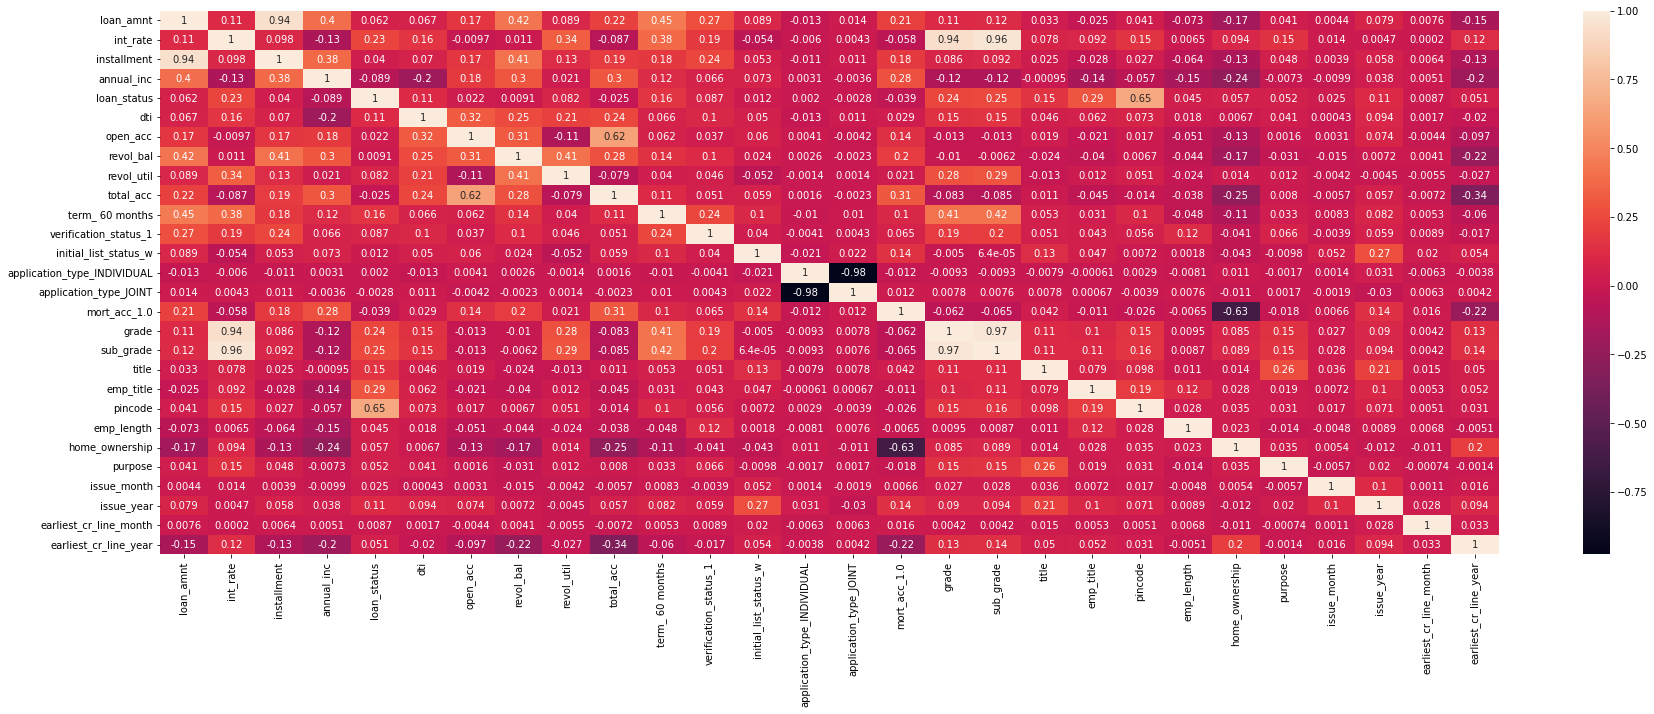

In [121]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True)

In [122]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'term_ 60 months', 'verification_status_1', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'mort_acc_1.0',
       'grade', 'sub_grade', 'title', 'emp_title', 'pincode', 'emp_length',
       'home_ownership', 'purpose', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [123]:
df.drop(['loan_amnt','sub_grade','open_acc','mort_acc_1.0','revol_bal'],axis=1, inplace = True)

### Model Building

In [124]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.] [[9.32155336e-01 6.78446643e-02]
 [8.45370448e-01 1.54629552e-01]
 [9.99554381e-01 4.45618759e-04]
 ...
 [9.98900046e-01 1.09995421e-03]
 [8.92975114e-01 1.07024886e-01]
 [8.41091096e-01 1.58908904e-01]]
*****Score is :0.9290895841770686******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.53      0.67     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.76      0.81     71569
weighted avg       0.90      0.90      0.89     71569



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [125]:
df.shape

(238561, 23)

In [126]:
col = ['int_rate', 'installment', 'annual_inc', 'dti', 'revol_util',
       'total_acc', 'term_ 60 months', 'verification_status_1',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'grade', 'title', 'emp_title', 'pincode',
       'emp_length', 'home_ownership', 'purpose', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year']

In [127]:
#Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166969
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37369.
Date:                Mon, 28 Nov 2022   Deviance:                       74739.
Time:                        22:29:32   Pearson chi2:                 8.93e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -12.6853      1.206    -10.518      0.000     -15.049     -10.322
int_rate                        1.4341      0.128     11.235      0.000       1.184       1.684
installment                     0.3605      0.049      7.305      0.000       0.264       0.457
annual_inc                     -0.7617      0.064    -11.821      0.000      -0.888      -0.635
dti                             0.5570      0.046     12.132      0.000       0.467       0.647
revol_util                      0.4152      0.042      9.902      0.000       0.333       0.497
total_acc                      -0.0561      0.053     -1.068      0.286      -0.159       0.047
term_ 60 months                 0.5589      0.024     23.180      0.000       0.512       0.606
verification_status_1           0.0954      0.021      4.449      0.000       0.053       0.137
initial_list_status_w          -0.1496      0.020     -7.424      0.000      -0.189      -0.110
application_type_INDIVIDUAL    -0.4616      1.171     -0.394      0.693      -2.756       1.833
application_type_JOINT         -0.6873      1.214     -0.566      0.571      -3.067       1.693
grade                           0.3686      0.099      3.730      0.000       0.175       0.562
title                           6.3522      0.193     32.941      0.000       5.974       6.730
emp_title                       6.8459      0.098     70.095      0.000       6.654       7.037
pincode                        38.3579      1.448     26.494      0.000      35.520      41.196
emp_length                      0.2301      0.041      5.646      0.000       0.150       0.310
home_ownership                  0.2299      0.021     10.895      0.000       0.189       0.271
purpose                        -0.2243      0.077     -2.914      0.004      -0.375      -0.073
issue_month                     0.1423      0.032      4.384      0.000       0.079       0.206
issue_year                      0.4460      0.030     15.106      0.000       0.388       0.504
earliest_cr_line_month          0.0601      0.032      1.874      0.061      -0.003       0.123
earliest_cr_line_year           0.7592      0.378      2.006      0.045       0.018       1.501
===============================================================================================
"""

In [128]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
9,application_type_INDIVIDUAL,157.18
21,earliest_cr_line_year,95.82
0,int_rate,42.76
11,grade,23.96
12,title,14.96
17,purpose,13.15
2,annual_inc,9.17
5,total_acc,8.19
3,dti,7.60
4,revol_util,7.38


In [129]:
X_train.columns

Index(['int_rate', 'installment', 'annual_inc', 'dti', 'revol_util',
       'total_acc', 'term_ 60 months', 'verification_status_1',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'grade', 'title', 'emp_title', 'pincode',
       'emp_length', 'home_ownership', 'purpose', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [130]:
## P-value and VIF for application_type_INDIVIDUAL is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.] [[9.31572429e-01 6.84275706e-02]
 [8.43141499e-01 1.56858501e-01]
 [9.99569204e-01 4.30796355e-04]
 ...
 [9.98949691e-01 1.05030924e-03]
 [8.93197713e-01 1.06802287e-01]
 [8.39207930e-01 1.60792070e-01]]
*****Score is :0.9290930306199405******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.53      0.67     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.76      0.80     71569
weighted avg       0.90      0.90      0.89     71569



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [131]:
#Logistic regression model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166970
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37369.
Date:                Mon, 28 Nov 2022   Deviance:                       74739.
Time:                        22:29:42   Pearson chi2:                 8.93e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -13.1470      0.290    -45.366      0.000     -13.715     -12.579
int_rate                   1.4340      0.128     11.234      0.000       1.184       1.684
installment                0.3604      0.049      7.303      0.000       0.264       0.457
annual_inc                -0.7614      0.064    -11.818      0.000      -0.888      -0.635
dti                        0.5573      0.046     12.139      0.000       0.467       0.647
revol_util                 0.4151      0.042      9.900      0.000       0.333       0.497
total_acc                 -0.0561      0.053     -1.068      0.286      -0.159       0.047
term_ 60 months            0.5588      0.024     23.178      0.000       0.512       0.606
verification_status_1      0.0954      0.021      4.449      0.000       0.053       0.137
initial_list_status_w     -0.1496      0.020     -7.424      0.000      -0.189      -0.110
application_type_JOINT    -0.2258      0.324     -0.697      0.486      -0.861       0.409
grade                      0.3689      0.099      3.733      0.000       0.175       0.563
title                      6.3523      0.193     32.942      0.000       5.974       6.730
emp_title                  6.8458      0.098     70.094      0.000       6.654       7.037
pincode                   38.3576      1.448     26.494      0.000      35.520      41.195
emp_length                 0.2301      0.041      5.646      0.000       0.150       0.310
home_ownership             0.2299      0.021     10.895      0.000       0.189       0.271
purpose                   -0.2244      0.077     -2.916      0.004      -0.375      -0.074
issue_month                0.1424      0.032      4.385      0.000       0.079       0.206
issue_year                 0.4459      0.030     15.102      0.000       0.388       0.504
earliest_cr_line_month     0.0601      0.032      1.875      0.061      -0.003       0.123
earliest_cr_line_year      0.7592      0.378      2.006      0.045       0.018       1.501
==========================================================================================
"""

In [132]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,41.93
20,earliest_cr_line_year,32.19
10,grade,23.26
11,title,14.55
16,purpose,12.60
2,annual_inc,8.69
3,dti,7.55
5,total_acc,7.31
4,revol_util,7.15
1,installment,6.00


In [133]:
## P-value and VIF for earliest_cr_line_year is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0. 0. 0. ... 0. 0. 0.] [[9.31389072e-01 6.86109279e-02]
 [8.41884440e-01 1.58115560e-01]
 [9.99572733e-01 4.27267242e-04]
 ...
 [9.98964834e-01 1.03516631e-03]
 [8.93529615e-01 1.06470385e-01]
 [8.37612545e-01 1.62387455e-01]]
*****Score is :0.9290824457698166******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.53      0.67     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.76      0.81     71569
weighted avg       0.90      0.90      0.89     71569



In [134]:
#Logistic regression model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166971
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37371.
Date:                Mon, 28 Nov 2022   Deviance:                       74743.
Time:                        22:29:52   Pearson chi2:                 8.93e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.9638      0.275    -47.146      0.000     -13.503     -12.425
int_rate                   1.4395      0.128     11.281      0.000       1.189       1.690
installment                0.3564      0.049      7.230      0.000       0.260       0.453
annual_inc                -0.7675      0.064    -11.925      0.000      -0.894      -0.641
dti                        0.5598      0.046     12.200      0.000       0.470       0.650
revol_util                 0.4066      0.042      9.750      0.000       0.325       0.488
total_acc                 -0.0853      0.051     -1.686      0.092      -0.184       0.014
term_ 60 months            0.5553      0.024     23.095      0.000       0.508       0.602
verification_status_1      0.0955      0.021      4.452      0.000       0.053       0.137
initial_list_status_w     -0.1477      0.020     -7.337      0.000      -0.187      -0.108
application_type_JOINT    -0.2201      0.324     -0.679      0.497      -0.855       0.415
grade                      0.3743      0.099      3.789      0.000       0.181       0.568
title                      6.3559      0.193     32.961      0.000       5.978       6.734
emp_title                  6.8480      0.098     70.114      0.000       6.657       7.039
pincode                   38.3578      1.448     26.493      0.000      35.520      41.196
emp_length                 0.2255      0.041      5.542      0.000       0.146       0.305
home_ownership             0.2336      0.021     11.115      0.000       0.192       0.275
purpose                   -0.2294      0.077     -2.982      0.003      -0.380      -0.079
issue_month                0.1419      0.032      4.371      0.000       0.078       0.206
issue_year                 0.4513      0.029     15.346      0.000       0.394       0.509
earliest_cr_line_month     0.0619      0.032      1.933      0.053      -0.001       0.125
==========================================================================================
"""

In [135]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,39.48
10,grade,22.39
11,title,13.47
16,purpose,11.85
2,annual_inc,8.15
3,dti,7.35
5,total_acc,7.31
4,revol_util,7.09
1,installment,6.00
17,issue_month,4.95


In [136]:
## P-value and VIF for earliest_cr_line_month is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','earliest_cr_line_month'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.] [[9.31575462e-01 6.84245378e-02]
 [8.46215477e-01 1.53784523e-01]
 [9.99583939e-01 4.16061182e-04]
 ...
 [9.98930911e-01 1.06908902e-03]
 [8.91838648e-01 1.08161352e-01]
 [8.39306554e-01 1.60693446e-01]]
*****Score is :0.9290707769683534******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.53      0.67     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.76      0.81     71569
weighted avg       0.90      0.90      0.89     71569



In [137]:
#Logistic regression model
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166972
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37373.
Date:                Mon, 28 Nov 2022   Deviance:                       74747.
Time:                        22:30:00   Pearson chi2:                 8.93e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.9357      0.275    -47.103      0.000     -13.474     -12.397
int_rate                   1.4381      0.128     11.270      0.000       1.188       1.688
installment                0.3569      0.049      7.240      0.000       0.260       0.453
annual_inc                -0.7668      0.064    -11.915      0.000      -0.893      -0.641
dti                        0.5604      0.046     12.213      0.000       0.470       0.650
revol_util                 0.4059      0.042      9.732      0.000       0.324       0.488
total_acc                 -0.0872      0.051     -1.724      0.085      -0.186       0.012
term_ 60 months            0.5551      0.024     23.088      0.000       0.508       0.602
verification_status_1      0.0957      0.021      4.466      0.000       0.054       0.138
initial_list_status_w     -0.1472      0.020     -7.312      0.000      -0.187      -0.108
application_type_JOINT    -0.2177      0.324     -0.672      0.502      -0.853       0.418
grade                      0.3754      0.099      3.801      0.000       0.182       0.569
title                      6.3576      0.193     32.971      0.000       5.980       6.736
emp_title                  6.8479      0.098     70.110      0.000       6.656       7.039
pincode                   38.3601      1.448     26.489      0.000      35.522      41.198
emp_length                 0.2261      0.041      5.559      0.000       0.146       0.306
home_ownership             0.2332      0.021     11.097      0.000       0.192       0.274
purpose                   -0.2292      0.077     -2.980      0.003      -0.380      -0.078
issue_month                0.1417      0.032      4.365      0.000       0.078       0.205
issue_year                 0.4524      0.029     15.384      0.000       0.395       0.510
==========================================================================================
"""

In [138]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,39.34
10,grade,22.32
11,title,13.37
16,purpose,11.79
2,annual_inc,8.10
3,dti,7.33
5,total_acc,7.30
4,revol_util,7.08
1,installment,6.00
17,issue_month,4.94


In [139]:
## P-value and VIF for title is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','earliest_cr_line_month','title'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.] [[9.13513892e-01 8.64861083e-02]
 [7.93064372e-01 2.06935628e-01]
 [9.99627307e-01 3.72693493e-04]
 ...
 [9.98925582e-01 1.07441793e-03]
 [8.92259668e-01 1.07740332e-01]
 [8.75694580e-01 1.24305420e-01]]
*****Score is :0.9252781944787096******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.52      0.66     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.75      0.80     71569
weighted avg       0.90      0.90      0.89     71569



In [140]:
#Logistic regression model
logm6 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166973
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37985.
Date:                Mon, 28 Nov 2022   Deviance:                       75969.
Time:                        22:30:08   Pearson chi2:                 9.00e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.0456      0.271    -44.434      0.000     -12.577     -11.514
int_rate                   1.4247      0.126     11.289      0.000       1.177       1.672
installment                0.3356      0.049      6.857      0.000       0.240       0.432
annual_inc                -0.7578      0.064    -11.854      0.000      -0.883      -0.632
dti                        0.5608      0.046     12.302      0.000       0.471       0.650
revol_util                 0.3572      0.041      8.634      0.000       0.276       0.438
total_acc                 -0.0914      0.050     -1.823      0.068      -0.190       0.007
term_ 60 months            0.5453      0.024     22.856      0.000       0.499       0.592
verification_status_1      0.0991      0.021      4.659      0.000       0.057       0.141
initial_list_status_w     -0.1173      0.020     -5.850      0.000      -0.157      -0.078
application_type_JOINT    -0.1054      0.325     -0.325      0.746      -0.742       0.531
grade                      0.4256      0.098      4.356      0.000       0.234       0.617
emp_title                  6.8828      0.097     70.961      0.000       6.693       7.073
pincode                   38.3091      1.439     26.629      0.000      35.489      41.129
emp_length                 0.2340      0.040      5.793      0.000       0.155       0.313
home_ownership             0.2337      0.021     11.212      0.000       0.193       0.275
purpose                    0.4979      0.073      6.791      0.000       0.354       0.642
issue_month                0.1448      0.032      4.504      0.000       0.082       0.208
issue_year                 0.5787      0.029     19.717      0.000       0.521       0.636
==========================================================================================
"""

In [141]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,39.07
10,grade,22.25
15,purpose,9.89
2,annual_inc,7.95
3,dti,7.29
5,total_acc,7.28
4,revol_util,7.07
1,installment,6.00
16,issue_month,4.87
11,emp_title,4.52


In [142]:
## P-value and VIF for total_acc is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','earliest_cr_line_month','title','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))

[0. 0. 0. ... 0. 0. 0.] [[9.14750597e-01 8.52494030e-02]
 [7.96022222e-01 2.03977778e-01]
 [9.99628399e-01 3.71600557e-04]
 ...
 [9.98909953e-01 1.09004652e-03]
 [8.94148018e-01 1.05851982e-01]
 [8.75346781e-01 1.24653219e-01]]
*****Score is :0.9252783250752565******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.52      0.66     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.75      0.80     71569
weighted avg       0.90      0.90      0.89     71569



In [143]:
#Logistic regression model
logm7 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166974
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37986.
Date:                Mon, 28 Nov 2022   Deviance:                       75972.
Time:                        22:30:15   Pearson chi2:                 9.00e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.0691      0.271    -44.562      0.000     -12.600     -11.538
int_rate                   1.4225      0.126     11.272      0.000       1.175       1.670
installment                0.3298      0.049      6.754      0.000       0.234       0.426
annual_inc                -0.7899      0.061    -12.845      0.000      -0.910      -0.669
dti                        0.5334      0.043     12.391      0.000       0.449       0.618
revol_util                 0.3685      0.041      9.003      0.000       0.288       0.449
term_ 60 months            0.5422      0.024     22.786      0.000       0.496       0.589
verification_status_1      0.1001      0.021      4.708      0.000       0.058       0.142
initial_list_status_w     -0.1170      0.020     -5.836      0.000      -0.156      -0.078
application_type_JOINT    -0.1022      0.325     -0.315      0.753      -0.739       0.534
grade                      0.4325      0.098      4.430      0.000       0.241       0.624
emp_title                  6.8858      0.097     70.994      0.000       6.696       7.076
pincode                   38.3106      1.439     26.625      0.000      35.490      41.131
emp_length                 0.2323      0.040      5.756      0.000       0.153       0.311
home_ownership             0.2398      0.021     11.659      0.000       0.200       0.280
purpose                    0.4969      0.073      6.774      0.000       0.353       0.641
issue_month                0.1448      0.032      4.504      0.000       0.082       0.208
issue_year                 0.5780      0.029     19.694      0.000       0.520       0.636
==========================================================================================
"""

In [144]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,38.85
9,grade,22.04
14,purpose,9.75
4,revol_util,6.98
2,annual_inc,6.79
3,dti,6.18
1,installment,5.98
15,issue_month,4.85
10,emp_title,4.51
16,issue_year,4.36


In [145]:

## P-value and VIF for application_type_JOINT is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[9.14777117e-01 8.52228830e-02]
 [7.96106551e-01 2.03893449e-01]
 [9.99628000e-01 3.72000272e-04]
 ...
 [9.98909168e-01 1.09083163e-03]
 [8.94200763e-01 1.05799237e-01]
 [8.75258940e-01 1.24741060e-01]]
*****Score is :0.9252791177962961******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.52      0.66     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.75      0.80     71569
weighted avg       0.90      0.90      0.89     71569



In [146]:
#Logistic regression model
logm8 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166975
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37986.
Date:                Mon, 28 Nov 2022   Deviance:                       75973.
Time:                        22:30:22   Pearson chi2:                 9.00e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.0692      0.271    -44.563      0.000     -12.600     -11.538
int_rate                  1.4231      0.126     11.277      0.000       1.176       1.670
installment               0.3296      0.049      6.750      0.000       0.234       0.425
annual_inc               -0.7897      0.061    -12.843      0.000      -0.910      -0.669
dti                       0.5332      0.043     12.388      0.000       0.449       0.618
revol_util                0.3685      0.041      9.004      0.000       0.288       0.449
term_ 60 months           0.5421      0.024     22.784      0.000       0.495       0.589
verification_status_1     0.1001      0.021      4.708      0.000       0.058       0.142
initial_list_status_w    -0.1172      0.020     -5.850      0.000      -0.156      -0.078
grade                     0.4320      0.098      4.425      0.000       0.241       0.623
emp_title                 6.8857      0.097     70.994      0.000       6.696       7.076
pincode                  38.3100      1.439     26.625      0.000      35.490      41.130
emp_length                0.2322      0.040      5.754      0.000       0.153       0.311
home_ownership            0.2399      0.021     11.665      0.000       0.200       0.280
purpose                   0.4967      0.073      6.773      0.000       0.353       0.640
issue_month               0.1448      0.032      4.504      0.000       0.082       0.208
issue_year                0.5785      0.029     19.737      0.000       0.521       0.636
=========================================================================================
"""

In [147]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
0,int_rate,38.84
8,grade,22.04
13,purpose,9.75
4,revol_util,6.98
2,annual_inc,6.79
3,dti,6.18
1,installment,5.98
14,issue_month,4.85
9,emp_title,4.51
15,issue_year,4.35


In [148]:

## VIF for grade is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','grade','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[9.14873301e-01 8.51266994e-02]
 [7.91634859e-01 2.08365141e-01]
 [9.99620142e-01 3.79857565e-04]
 ...
 [9.98895473e-01 1.10452701e-03]
 [8.94770140e-01 1.05229860e-01]
 [8.68399493e-01 1.31600507e-01]]
*****Score is :0.9251613823973591******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.90      0.52      0.66     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.75      0.80     71569
weighted avg       0.90      0.90      0.89     71569



In [149]:
#Logistic regression model
logm9 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               166992
Model:                            GLM   Df Residuals:                   166976
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37996.
Date:                Mon, 28 Nov 2022   Deviance:                       75992.
Time:                        22:30:28   Pearson chi2:                 9.00e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.3879
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.1560      0.270    -45.020      0.000     -12.685     -11.627
int_rate                  1.9378      0.049     39.378      0.000       1.841       2.034
installment               0.3214      0.049      6.585      0.000       0.226       0.417
annual_inc               -0.7909      0.061    -12.862      0.000      -0.911      -0.670
dti                       0.5288      0.043     12.290      0.000       0.444       0.613
revol_util                0.3586      0.041      8.773      0.000       0.279       0.439
term_ 60 months           0.5565      0.024     23.612      0.000       0.510       0.603
verification_status_1     0.1008      0.021      4.738      0.000       0.059       0.142
initial_list_status_w    -0.1134      0.020     -5.667      0.000      -0.153      -0.074
emp_title                 6.8913      0.097     71.046      0.000       6.701       7.081
pincode                  38.3027      1.438     26.636      0.000      35.484      41.121
emp_length                0.2329      0.040      5.773      0.000       0.154       0.312
home_ownership            0.2420      0.021     11.774      0.000       0.202       0.282
purpose                   0.5070      0.073      6.910      0.000       0.363       0.651
issue_month               0.1439      0.032      4.478      0.000       0.081       0.207
issue_year                0.6144      0.028     21.727      0.000       0.559       0.670
=========================================================================================
"""

In [150]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
12,purpose,9.62
4,revol_util,6.85
0,int_rate,6.73
2,annual_inc,6.67
3,dti,6.10
1,installment,5.95
13,issue_month,4.82
8,emp_title,4.50
14,issue_year,4.22
6,verification_status_1,2.97


In [151]:

## VIF for grade is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','emp_length','grade','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[9.18635003e-01 8.13649968e-02]
 [8.21304854e-01 1.78695146e-01]
 [9.99621103e-01 3.78896834e-04]
 ...
 [9.98879590e-01 1.12041038e-03]
 [8.92634659e-01 1.07365341e-01]
 [8.67197915e-01 1.32802085e-01]]
*****Score is :0.9251169142731486******
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     58474
         1.0       0.91      0.52      0.66     13095

    accuracy                           0.90     71569
   macro avg       0.90      0.75      0.80     71569
weighted avg       0.90      0.90      0.89     71569



In [152]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
11,purpose,9.60
4,revol_util,6.85
0,int_rate,6.73
2,annual_inc,6.63
3,dti,6.10
1,installment,5.95
12,issue_month,4.82
8,emp_title,4.42
13,issue_year,4.22
6,verification_status_1,2.90


In [153]:

## VIF for grade is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','emp_title','emp_length','grade','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[9.25482412e-01 7.45175881e-02]
 [8.58210822e-01 1.41789178e-01]
 [9.98613013e-01 1.38698728e-03]
 ...
 [9.99396176e-01 6.03824117e-04]
 [9.21794278e-01 7.82057217e-02]
 [8.45114527e-01 1.54885473e-01]]
*****Score is :0.9055412558866556******
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     58474
         1.0       0.95      0.46      0.62     13095

    accuracy                           0.90     71569
   macro avg       0.92      0.72      0.78     71569
weighted avg       0.90      0.90      0.88     71569



In [154]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
10,purpose,9.35
4,revol_util,6.84
0,int_rate,6.68
2,annual_inc,6.63
3,dti,6.03
1,installment,5.95
11,issue_month,4.78
12,issue_year,4.15
6,verification_status_1,2.90
9,home_ownership,2.23


In [155]:

## VIF for purpose is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','purpose','emp_title','emp_length','grade','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[9.27755222e-01 7.22447777e-02]
 [8.62912095e-01 1.37087905e-01]
 [9.98659638e-01 1.34036194e-03]
 ...
 [9.99352514e-01 6.47485594e-04]
 [9.24423709e-01 7.55762910e-02]
 [8.35926606e-01 1.64073394e-01]]
*****Score is :0.9052690548099736******
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     58474
         1.0       0.95      0.46      0.62     13095

    accuracy                           0.90     71569
   macro avg       0.92      0.73      0.78     71569
weighted avg       0.90      0.90      0.88     71569



In [156]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
4,revol_util,6.82
0,int_rate,6.29
2,annual_inc,6.05
1,installment,5.93
3,dti,5.73
10,issue_month,4.62
11,issue_year,4.10
6,verification_status_1,2.88
9,home_ownership,2.16
7,initial_list_status_w,1.74


In [157]:

## VIF for annual_inc is high, removing the column

X = df.drop(['loan_status','application_type_INDIVIDUAL','earliest_cr_line_year','purpose','annual_inc','emp_title','emp_length','grade','earliest_cr_line_month','title','application_type_JOINT','total_acc'],axis=1)
y = df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

logsk = LogisticRegression()
logsk.fit(X_train, y_train)

y_pred = logsk.predict(X_test)
y_pred_prob=logsk.predict_proba(X_test)

#Probabilities
print(y_pred,y_pred_prob)

#score
print('*****Score is :'+ str(roc_auc_score(y_test, y_pred_prob[:,1]))+'******')

print(classification_report(y_test,y_pred))


[0. 0. 0. ... 0. 0. 0.] [[0.90966888 0.09033112]
 [0.87245463 0.12754537]
 [0.99869482 0.00130518]
 ...
 [0.99889543 0.00110457]
 [0.89346359 0.10653641]
 [0.86144961 0.13855039]]
*****Score is :0.9033841888040546******
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     58474
         1.0       0.96      0.45      0.61     13095

    accuracy                           0.90     71569
   macro avg       0.92      0.72      0.78     71569
weighted avg       0.90      0.90      0.88     71569



In [158]:
xtrain_vif1 = X_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
3,revol_util,6.47
0,int_rate,6.27
2,dti,5.72
1,installment,4.62
9,issue_month,4.39
10,issue_year,4.01
5,verification_status_1,2.87
8,home_ownership,2.16
6,initial_list_status_w,1.73
4,term_ 60 months,1.60


In [159]:
logsk.coef_

array([[ 2.19782436, -0.09273059,  0.74539676,  0.21405641,  0.42921008,
         0.15282871, -0.0827971 , 24.64755252,  0.2997662 ,  0.12556166,
         0.77894413]])

In [160]:
col = ['int_rate', 'installment', 'dti', 'revol_util', 'term_ 60 months',
       'verification_status_1', 'initial_list_status_w', 'pincode',
       'home_ownership', 'issue_month', 'issue_year']

In [161]:
for idx, col_name in enumerate(X_train[col].columns):
    print("The coefficient for {} is {}".format(col_name, np.round(logsk.coef_[0][idx],2)))

The coefficient for int_rate is 2.2
The coefficient for installment is -0.09
The coefficient for dti is 0.75
The coefficient for revol_util is 0.21
The coefficient for term_ 60 months is 0.43
The coefficient for verification_status_1 is 0.15
The coefficient for initial_list_status_w is -0.08
The coefficient for pincode is 24.65
The coefficient for home_ownership is 0.3
The coefficient for issue_month is 0.13
The coefficient for issue_year is 0.78


### Classification Report (Confusion Matrix,ROCAUC Score)

In [162]:
metrics.confusion_matrix(y_test, y_pred)

array([[58211,   263],
       [ 7201,  5894]], dtype=int64)

In [163]:
print(classification_report(y_pred,y_test))

roc_auc_score(y_test, y_pred_prob[:,1])

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     65412
         1.0       0.45      0.96      0.61      6157

    accuracy                           0.90     71569
   macro avg       0.72      0.92      0.78     71569
weighted avg       0.95      0.90      0.91     71569



0.9033841888040546

Text(0, 0.5, 'True Positive rate')

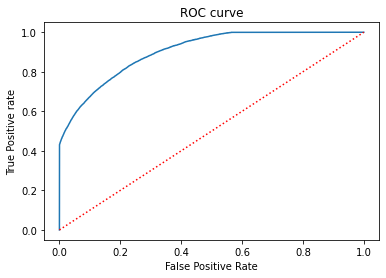

In [164]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr)
plt.plot(p_fpr, p_tpr, linestyle=':', color='red')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

Text(0, 0.5, 'Precision')

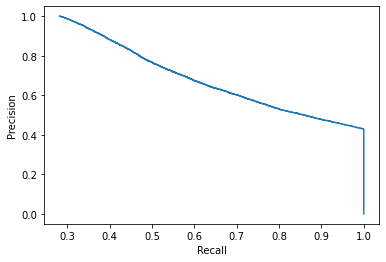

In [165]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')

### Tradeoff Questions:

### Questionnaire

### Insights

### Recommendations

In [ ]:
--As LoanTap has high percentage of defaulters than other banks, there is high risk of NPAs,
hence LoanTap should try to lower the amount of defaulters to 5%
--LoanTap should provide slightly higher interest rate which can help them in offsetting the risk
of defaulters and maintain the profitability.
--Using the model, LoanTap can easily reduce the number of defaulters in their portfolio.
--As pincode place a very important role, Pincode based market segmentation should be
included in stategic level
--As higher loan terms has higher changes of defaulters, LoanTap should focus more on Loan
for shorter duration ie. 36 months